In [27]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score



In [28]:
from wordcloud import WordCloud, STOPWORDS


In [29]:
print(STOPWORDS)

{'again', 'when', 'own', "i'd", 'they', 'yourselves', "hasn't", 'after', 'hers', "we've", 'or', "we'll", "i'll", "don't", "he's", "she'll", 'below', 'could', 'our', 'so', 'herself', "you're", 'have', 'where', 'can', "we're", 'if', 'therefore', "where's", 'however', 'of', 'further', 'do', 'who', 'ought', 'only', 'a', "shan't", 'she', 'him', "aren't", "weren't", 'such', 'other', 'these', 'under', "they'll", 'my', 'are', 'would', 'just', 'once', "what's", 'in', "shouldn't", 'doing', 'how', 'that', 'there', 'his', 'an', 'your', 'me', 'against', "it's", 'more', "doesn't", 'its', "she'd", "they'd", 'i', 'until', 'we', 'www', "haven't", "isn't", 'same', 'yourself', 'with', "didn't", "she's", "that's", 'you', "you've", "they've", 'it', "why's", 'during', 'through', 'does', 'should', 'like', "couldn't", "i've", 'since', 'has', "you'll", 'between', 'any', 'before', 'been', 'what', 'them', 'themselves', 'from', 'whom', 'ever', 'few', 'their', 'too', "you'd", "let's", 'no', "who's", 'get', 'while'

In [30]:
train = pd.read_csv('fake_train.csv.csv')
test = pd.read_csv('fake_test.csv.csv')

In [31]:
train.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [32]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [33]:
print(train.isnull().sum())
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
id          0
title     122
author    503
text        7
dtype: int64


In [34]:
print(test.shape, train.shape)

(5200, 4) (20800, 5)


In [35]:
train['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [36]:
test = test.fillna(' ')
train = train.fillna(' ')
test['total'] = test['title']+' '+test['author']+test['text']
train['total'] = train['title']+' '+train['author']+train['text']

In [37]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "


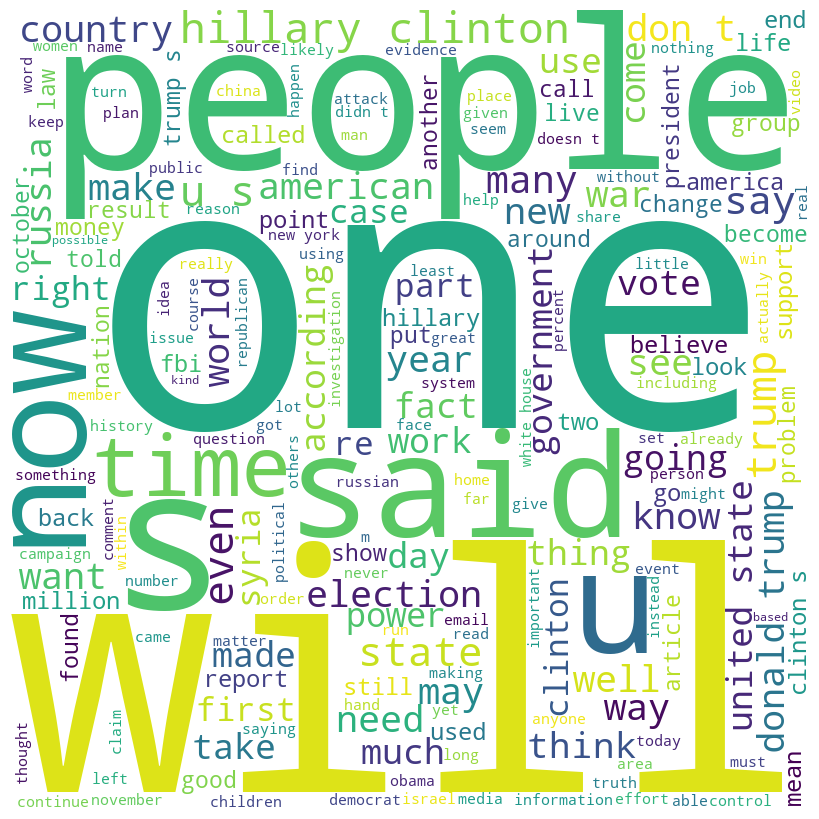

In [38]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color = 'white',
                stopwords = stopwords,
                min_font_size = 10).generate(real_words) 




plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)


plt.show()